In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier


In [16]:
X_train = pd.read_csv('data/processed/X_train.csv')   

In [24]:
X_train.columns.to_list()

['Benefit per order',
 'Sales per customer',
 'Category Id',
 'Customer Zipcode',
 'Department Id',
 'Latitude',
 'Longitude',
 'Order Item Discount',
 'Order Item Discount Rate',
 'Order Item Product Price',
 'Order Item Profit Ratio',
 'Order Item Quantity',
 'Sales',
 'Order Item Total',
 'Order Profit Per Order',
 'Order Zipcode',
 'Product Price',
 'Product Status',
 'order_year',
 'order_month',
 'order_day',
 'order_weekday',
 'order_hour',
 'Type_CASH',
 'Type_DEBIT',
 'Type_PAYMENT',
 'Type_TRANSFER',
 'Category Name_Accessories',
 'Category Name_As Seen on  TV!',
 'Category Name_Baby ',
 'Category Name_Baseball & Softball',
 'Category Name_Basketball',
 'Category Name_Books ',
 'Category Name_Boxing & MMA',
 'Category Name_CDs ',
 'Category Name_Cameras ',
 'Category Name_Camping & Hiking',
 'Category Name_Cardio Equipment',
 "Category Name_Children's Clothing",
 'Category Name_Cleats',
 'Category Name_Computers',
 'Category Name_Consumer Electronics',
 'Category Name_Crafts'

In [ ]:
X_train.isnull().sum().to_frame().sort_values(by=0, ascending=False)

[0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 124583,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,

In [20]:
X_test = pd.read_csv('data/processed/X_test.csv')

In [21]:
X_test.isnull().sum().to_frame().sort_values(by=0, ascending=False)

,0
Order Zipcode,31096
Customer Zipcode,1
Benefit per order,0
Order Country_Suecia,0
Order Country_SudAfrica,0
...,...
Customer State_CT,0
Customer State_CO,0
Customer State_CA,0
Customer State_AZ,0


In [31]:
pd.set_option('display.max_columns', None)

In [32]:
df = pd.read_csv('/Users/santiagozalazar/Desktop/FAKU/CURSANDING/Ciencia de Datos/trabajo_practico/DataCoSupplyChainDataset.csv', delimiter=';')

In [33]:
df.head()

,Unnamed: 0,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [34]:
df.columns.tolist()

['Unnamed: 0',
 'Type',
 'Days for shipping (real)',
 'Days for shipment (scheduled)',
 'Benefit per order',
 'Sales per customer',
 'Delivery Status',
 'Late_delivery_risk',
 'Category Id',
 'Category Name',
 'Customer City',
 'Customer Country',
 'Customer Email',
 'Customer Fname',
 'Customer Id',
 'Customer Lname',
 'Customer Password',
 'Customer Segment',
 'Customer State',
 'Customer Street',
 'Customer Zipcode',
 'Department Id',
 'Department Name',
 'Latitude',
 'Longitude',
 'Market',
 'Order City',
 'Order Country',
 'Order Customer Id',
 'order date (DateOrders)',
 'Order Id',
 'Order Item Cardprod Id',
 'Order Item Discount',
 'Order Item Discount Rate',
 'Order Item Id',
 'Order Item Product Price',
 'Order Item Profit Ratio',
 'Order Item Quantity',
 'Sales',
 'Order Item Total',
 'Order Profit Per Order',
 'Order Region',
 'Order State',
 'Order Status',
 'Order Zipcode',
 'Product Card Id',
 'Product Category Id',
 'Product Description',
 'Product Image',
 'Product Nam

In [35]:
df.isnull().sum()

Unnamed: 0                            0
Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0


In [36]:
df_cat = df.select_dtypes(include=['object'])
df_num = df.select_dtypes(include=[np.number])


In [37]:
df_cat.describe()

,Type,Delivery Status,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Department Name,Market,Order City,Order Country,order date (DateOrders),Order Region,Order State,Order Status,Product Image,Product Name,shipping date (DateOrders),Shipping Mode
count,180519,180519,180519,180519,180519,180519,180519,180511,180519,180519,180519,180519,180519,180519,180519,180519,180519,180519,180519,180519,180519,180519,180519,180519
unique,4,4,50,563,2,1,782,1109,1,3,46,6953,11,5,3597,164,65752,23,1089,9,118,118,63701,4
top,DEBIT,Late delivery,Cleats,Caguas,EE. UU.,XXXXXXXXX,Mary,Smith,XXXXXXXXX,Consumer,PR,9126 Wishing Expressway,Fan Shop,LATAM,Santo Domingo,Estados Unidos,12/14/2016 12:29,Central America,Inglaterra,COMPLETE,http://images.acmesports.sports/Perfect+Fitnes...,Perfect Fitness Perfect Rip Deck,1/5/2016 5:58,Standard Class
freq,69295,98977,24551,66770,111146,180519,65150,64104,180519,93504,69373,124,66861,51594,2211,24840,5,28341,6722,59491,24515,24515,10,107752


In [38]:
#Droppear: Customer Email, Customer Password, Customer Fname, Customer Lname, Customer Street, Product Description, Product Image
df_cat = df_cat.drop(columns=['Customer Email', 'Customer Password', 'Customer Fname', 'Customer Lname', 'Customer Street', 'Product Name', 'Product Image'])

In [39]:
df_num.describe()

,Unnamed: 0,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,Longitude,Order Customer Id,Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0
mean,90259.000000,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,-84.915675,6691.379495,36221.894903,692.509764,20.664741,0.101668,90260.000000,141.232550,0.120647,2.127638,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,NaN,141.232550,0.0
std,52111.490959,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,21.433241,4162.918106,21045.379569,336.446807,21.800901,0.070415,52111.490959,139.732492,0.466796,1.453451,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,NaN,139.732492,0.0
min,0.000000,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,-158.025986,1.000000,1.000000,19.000000,0.000000,0.000000,1.000000,9.990000,-2.750000,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,45129.500000,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,-98.446312,3258.500000,18057.000000,403.000000,5.400000,0.040000,45130.500000,50.000000,0.080000,1.000000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,NaN,50.000000,0.0
50%,90259.000000,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,-76.847908,6457.000000,36140.000000,627.000000,14.000000,0.100000,90260.000000,59.990002,0.270000,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,NaN,59.990002,0.0
75%,135388.500000,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,-66.370583,9779.000000,54144.000000,1004.000000,29.990000,0.160000,135389.500000,199.990005,0.360000,3.000000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,NaN,199.990005,0.0
max,180518.000000,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,115.263077,20757.000000,77204.000000,1363.000000,500.000000,0.250000,180519.000000,1999.989990,0.500000,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,NaN,1999.989990,0.0


In [40]:
#Droppear: Customer ID, Unnamed: 0, Product ID, Days for shipment(scheduled), Late_delivery_risk, Customer Id, Order Customer Id, Order Id, Order Item Cardprod Id, Order Item Id, 
# Order Zipcode, Product Card Id, Product Description, Product Status.

df_num = df_num.drop(columns=['Customer Id', 'Unnamed: 0', 'Late_delivery_risk',
 'Customer Id', 'Order Customer Id', 'Order Id', 'Order Item Cardprod Id', 'Order Item Id', 
 'Order Zipcode', 'Product Card Id', 'Product Description', 'Product Status'])


In [41]:
df_filt = pd.concat([df_cat, df_num], axis=1)

df_filt.head()
df_filt.describe()
print(df_filt.isnull().sum())
#df_filt.dropna(inplace=True)
df_filt.describe()



Type                             0
Delivery Status                  0
Category Name                    0
Customer City                    0
Customer Country                 0
Customer Segment                 0
Customer State                   0
Department Name                  0
Market                           0
Order City                       0
Order Country                    0
order date (DateOrders)          0
Order Region                     0
Order State                      0
Order Status                     0
shipping date (DateOrders)       0
Shipping Mode                    0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Category Id                      0
Customer Zipcode                 3
Department Id                    0
Latitude                         0
Longitude                        0
Order Item Discount              0
Order Item Discount Rate         0
Order Item Product P

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Category Id,Customer Zipcode,Department Id,Latitude,Longitude,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Category Id,Product Price
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000
mean,3.497654,2.931847,21.974989,183.107609,31.851451,35921.126914,5.443460,29.719955,-84.915675,20.664741,0.101668,141.232550,0.120647,2.127638,203.772096,183.107609,21.974989,31.851451,141.232550
std,1.623722,1.374449,104.433526,120.043670,15.640064,37542.461122,1.629246,9.813646,21.433241,21.800901,0.070415,139.732492,0.466796,1.453451,132.273077,120.043670,104.433526,15.640064,139.732492
min,0.000000,0.000000,-4274.979980,7.490000,2.000000,603.000000,2.000000,-33.937553,-158.025986,0.000000,0.000000,9.990000,-2.750000,1.000000,9.990000,7.490000,-4274.979980,2.000000,9.990000
25%,2.000000,2.000000,7.000000,104.379997,18.000000,725.000000,4.000000,18.265432,-98.446312,5.400000,0.040000,50.000000,0.080000,1.000000,119.980003,104.379997,7.000000,18.000000,50.000000
50%,3.000000,4.000000,31.520000,163.990005,29.000000,19380.000000,5.000000,33.144863,-76.847908,14.000000,0.100000,59.990002,0.270000,1.000000,199.919998,163.990005,31.520000,29.000000,59.990002
75%,5.000000,4.000000,64.800003,247.399994,45.000000,78207.000000,7.000000,39.279617,-66.370583,29.990000,0.160000,199.990005,0.360000,3.000000,299.950012,247.399994,64.800003,45.000000,199.990005
max,6.000000,4.000000,911.799988,1939.989990,76.000000,99205.000000,12.000000,48.781933,115.263077,500.000000,0.250000,1999.989990,0.500000,5.000000,1999.989990,1939.989990,911.799988,76.000000,1999.989990


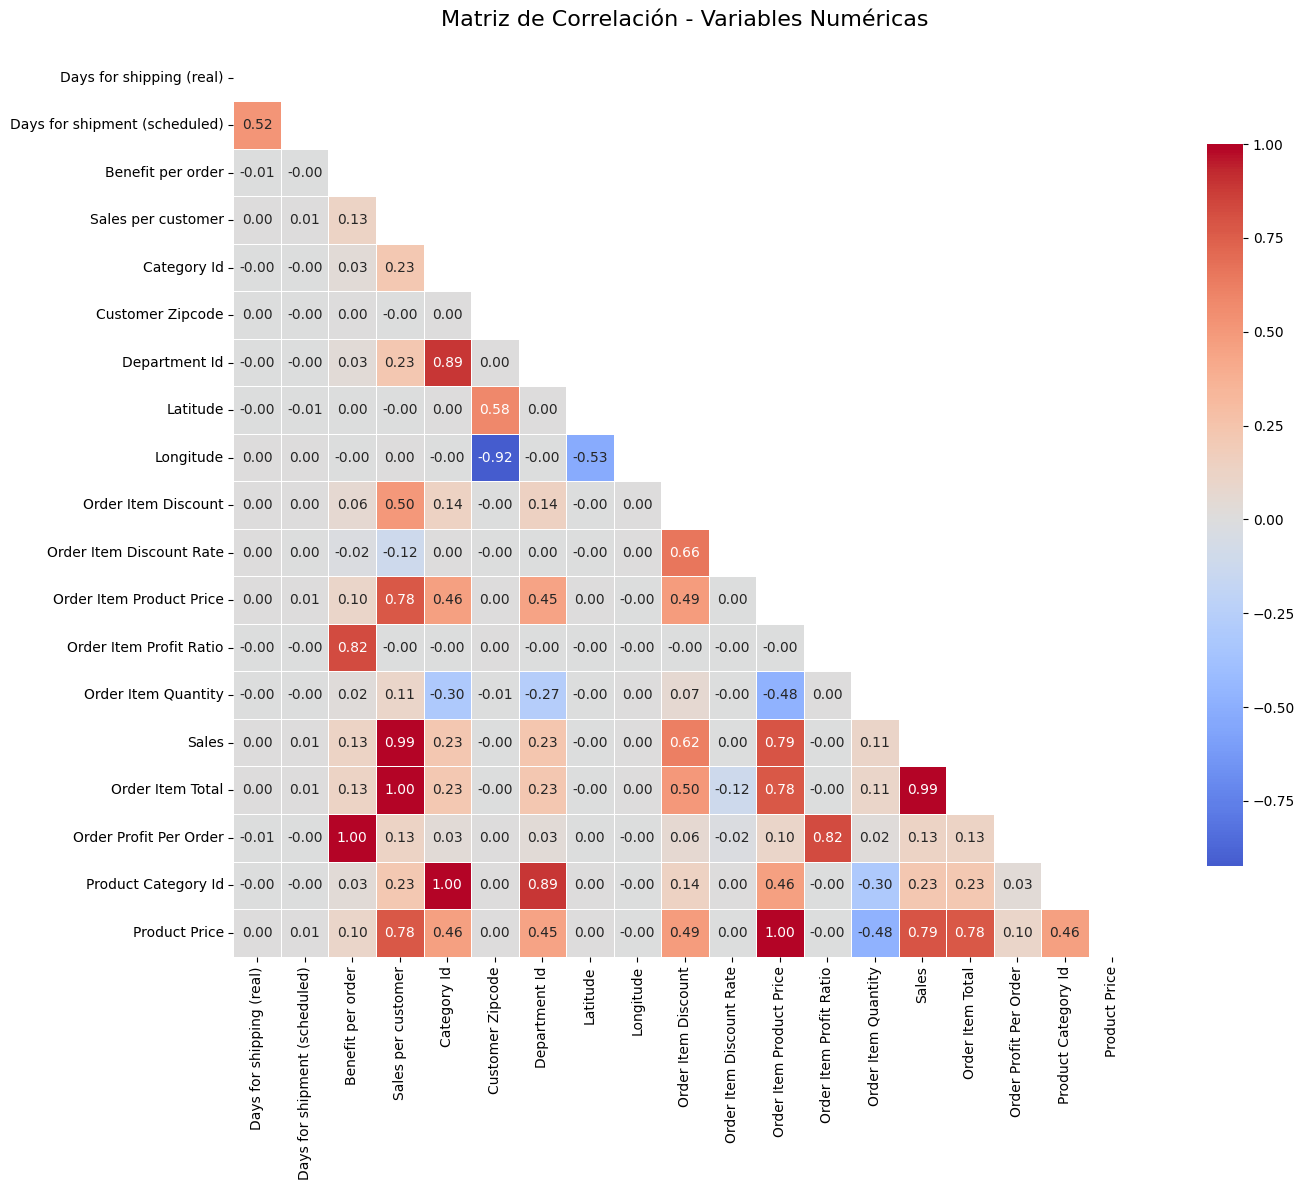

In [42]:
# Análisis de Correlación
# Seleccionar solo las columnas numéricas para el análisis de correlación
numeric_cols_for_corr = df_filt.select_dtypes(include=[np.number]).columns.tolist()

# Calcular la matriz de correlación
correlation_matrix = df_filt[numeric_cols_for_corr].corr()

# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(16, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Máscara para mostrar solo el triángulo inferior
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm', 
            center=0,
            square=True, 
            linewidths=0.5,
            cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación - Variables Numéricas', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

CORRELACIONES CON LA VARIABLE OBJETIVO: 'Days for shipping (real)'
Days for shipping (real)         1.000000
Days for shipment (scheduled)    0.515880
Longitude                        0.003911
Order Item Discount              0.002231
Order Item Product Price         0.002185
Product Price                    0.002185
Sales                            0.001962
Sales per customer               0.001757
Order Item Total                 0.001757
Order Item Discount Rate         0.001467
Customer Zipcode                 0.000112
Category Id                     -0.000348
Product Category Id             -0.000348
Order Item Quantity             -0.000811
Department Id                   -0.001631
Latitude                        -0.004073
Order Item Profit Ratio         -0.004638
Benefit per order               -0.005101
Order Profit Per Order          -0.005101
Name: Days for shipping (real), dtype: float64




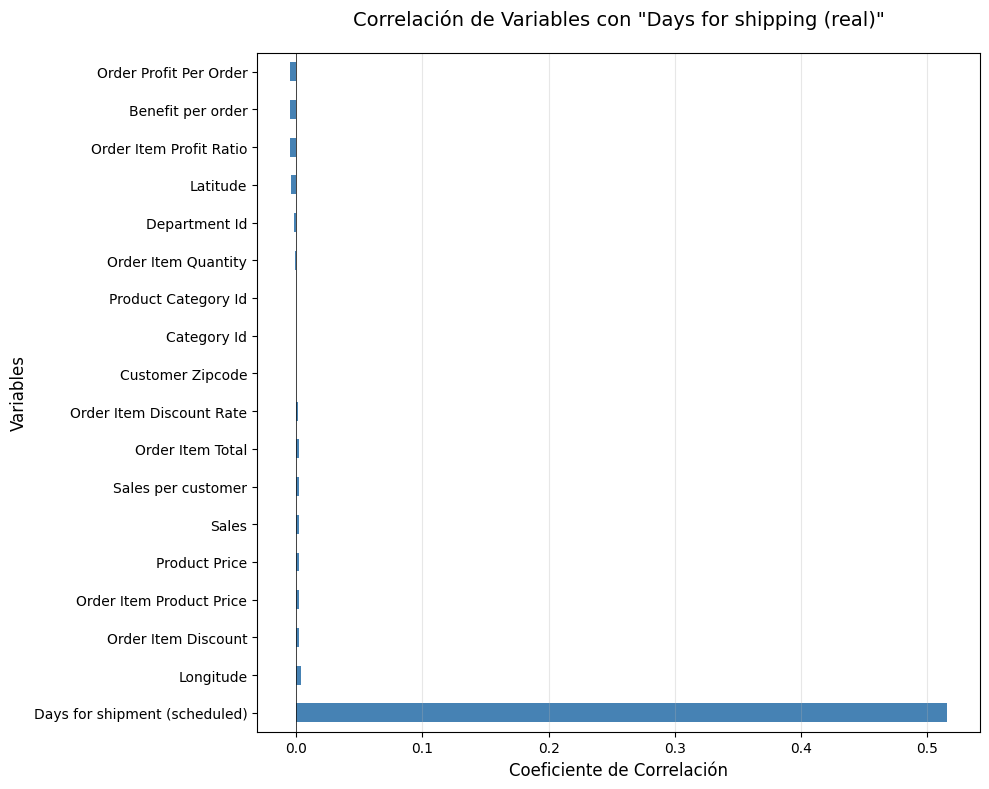

In [43]:
# Análisis de correlación con la variable objetivo
target = 'Days for shipping (real)'
correlations_with_target = correlation_matrix[target].sort_values(ascending=False)

print("=" * 60)
print("CORRELACIONES CON LA VARIABLE OBJETIVO: 'Days for shipping (real)'")
print("=" * 60)
print(correlations_with_target)
print("\n")

# Visualizar las correlaciones con la variable objetivo
plt.figure(figsize=(10, 8))
correlations_with_target.drop(target).plot(kind='barh', color='steelblue')
plt.title(f'Correlación de Variables con "{target}"', fontsize=14, pad=20)
plt.xlabel('Coeficiente de Correlación', fontsize=12)
plt.ylabel('Variables', fontsize=12)
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

PARES DE VARIABLES CON CORRELACIÓN ALTA (>= 0.7)
              Variable 1               Variable 2  Correlación
Order Item Product Price            Product Price     1.000000
      Sales per customer         Order Item Total     1.000000
             Category Id      Product Category Id     1.000000
       Benefit per order   Order Profit Per Order     1.000000
                   Sales         Order Item Total     0.989744
      Sales per customer                    Sales     0.989744
        Customer Zipcode                Longitude    -0.923921
             Category Id            Department Id     0.888835
           Department Id      Product Category Id     0.888835
 Order Item Profit Ratio   Order Profit Per Order     0.823689
       Benefit per order  Order Item Profit Ratio     0.823689
Order Item Product Price                    Sales     0.789948
                   Sales            Product Price     0.789948
Order Item Product Price         Order Item Total     0.781781
      

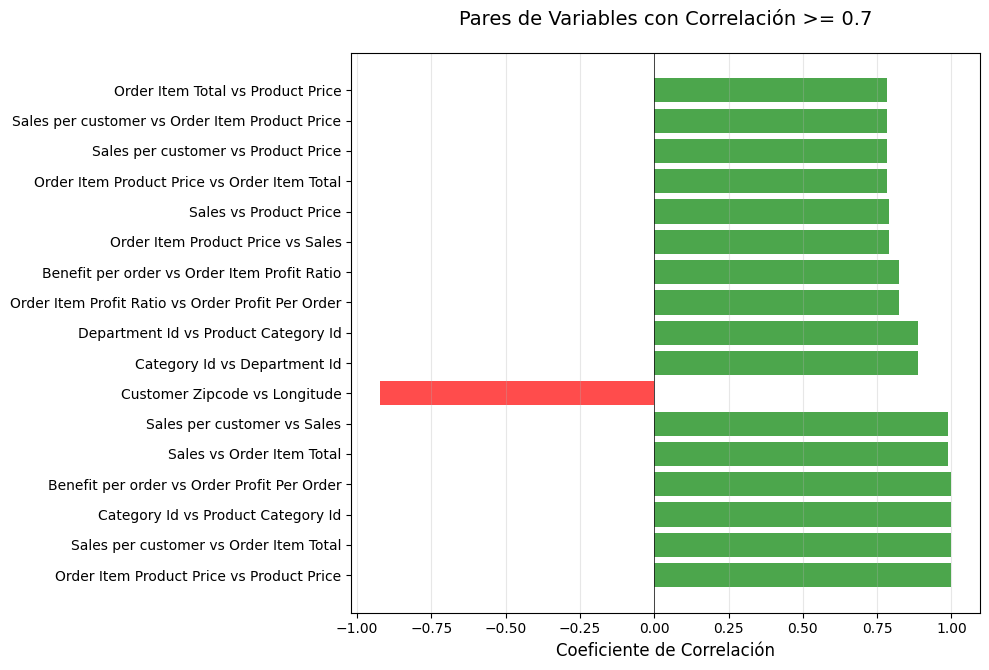

In [44]:
# Identificar pares de variables altamente correlacionadas (multicolinealidad)
# Esto es útil para identificar variables redundantes

# Crear una lista de pares con alta correlación
high_corr_pairs = []
threshold = 0.7  # Umbral de correlación alta

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) >= threshold:
            high_corr_pairs.append({
                'Variable 1': correlation_matrix.columns[i],
                'Variable 2': correlation_matrix.columns[j],
                'Correlación': corr_value
            })

if high_corr_pairs:
    high_corr_df = pd.DataFrame(high_corr_pairs)
    high_corr_df = high_corr_df.sort_values('Correlación', key=abs, ascending=False)
    
    print("=" * 80)
    print(f"PARES DE VARIABLES CON CORRELACIÓN ALTA (>= {threshold})")
    print("=" * 80)
    print(high_corr_df.to_string(index=False))
    print("\n")
    
    # Visualizar las correlaciones altas
    if len(high_corr_df) > 0:
        plt.figure(figsize=(10, max(6, len(high_corr_df) * 0.4)))
        colors = ['red' if x < 0 else 'green' for x in high_corr_df['Correlación']]
        plt.barh(range(len(high_corr_df)), high_corr_df['Correlación'], color=colors, alpha=0.7)
        plt.yticks(range(len(high_corr_df)), 
                  [f"{row['Variable 1']} vs {row['Variable 2']}" 
                   for _, row in high_corr_df.iterrows()])
        plt.xlabel('Coeficiente de Correlación', fontsize=12)
        plt.title(f'Pares de Variables con Correlación >= {threshold}', fontsize=14, pad=20)
        plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
        plt.grid(axis='x', alpha=0.3)
        plt.tight_layout()
        plt.show()
else:
    print(f"No se encontraron pares de variables con correlación >= {threshold}")

In [45]:
# Análisis estadístico de correlaciones
print("=" * 60)
print("RESUMEN ESTADÍSTICO DE CORRELACIONES")
print("=" * 60)

# Excluir la diagonal (correlación de 1.0 consigo misma)
mask_diagonal = ~np.eye(correlation_matrix.shape[0], dtype=bool)
corr_values = correlation_matrix.values[mask_diagonal]

print(f"Correlación mínima: {corr_values.min():.4f}")
print(f"Correlación máxima: {corr_values.max():.4f}")
print(f"Correlación promedio: {corr_values.mean():.4f}")
print(f"Desviación estándar: {corr_values.std():.4f}")
print(f"\nNúmero de correlaciones >= 0.7: {np.sum(np.abs(corr_values) >= 0.7)}")
print(f"Número de correlaciones >= 0.5: {np.sum(np.abs(corr_values) >= 0.5)}")
print(f"Número de correlaciones >= 0.3: {np.sum(np.abs(corr_values) >= 0.3)}")

RESUMEN ESTADÍSTICO DE CORRELACIONES
Correlación mínima: -0.9239
Correlación máxima: 1.0000
Correlación promedio: 0.1291
Desviación estándar: 0.3057

Número de correlaciones >= 0.7: 34
Número de correlaciones >= 0.5: 44
Número de correlaciones >= 0.3: 72


In [46]:
# Eliminar columnas con correlación > 0.5
threshold = 0.5
columns_to_drop = set()

# Usar correlation_matrix y correlations_with_target ya calculados
for i in range(len(correlation_matrix.columns)):
    col1 = correlation_matrix.columns[i]
    if col1 == target or col1 in columns_to_drop:
        continue
    for j in range(i+1, len(correlation_matrix.columns)):
        col2 = correlation_matrix.columns[j]
        if col2 == target or col2 in columns_to_drop:
            continue
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            # Mantener la que tiene mayor correlación absoluta con el target
            if abs(correlations_with_target[col1]) >= abs(correlations_with_target[col2]):
                columns_to_drop.add(col2)
            else:
                columns_to_drop.add(col1)
                break

columns_to_drop = list(columns_to_drop)
print(f"Eliminando {len(columns_to_drop)} columnas: {columns_to_drop}")

# Eliminar de df_num y df_filt
df_num = df_num.drop(columns=[col for col in columns_to_drop if col in df_num.columns])
df_filt = df_filt.drop(columns=columns_to_drop)

Eliminando 11 columnas: ['Customer Zipcode', 'Order Item Total', 'Sales per customer', 'Order Profit Per Order', 'Longitude', 'Product Category Id', 'Order Item Profit Ratio', 'Category Id', 'Order Item Discount Rate', 'Product Price', 'Sales']


In [47]:
df_filt.shape

(180519, 25)

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import xgboost as xgb

In [49]:
# 1. Create binary target
y = (df_filt['Days for shipping (real)'] > df_filt['Days for shipment (scheduled)']).astype(int)
X = df_filt.drop(columns=['Days for shipping (real)', 'Days for shipment (scheduled)'])

# 2. Split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [50]:
'''
y = df_filt['Days for shipping (real)']
X = df_filt.drop(columns=['Days for shipping (real)'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
'''

"\ny = df_filt['Days for shipping (real)']\nX = df_filt.drop(columns=['Days for shipping (real)'])\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n"

In [51]:
numeric_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=True, handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

# Create the model with parallel processing and memory optimization
model = xgb.XGBClassifier(
    eval_metric='logloss', 
    random_state=42, 
    use_label_encoder=False,
    n_jobs=-1,
    tree_method='hist'
)

# Build the complete pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

In [52]:
pipeline.fit(X_train, y_train)

/Users/santiagozalazar/Desktop/FAKU/CURSANDING/Ciencia de Datos/trabajo_practico/.venv/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [10:19:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'passthrough'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transfor

In [53]:
y_pred = pipeline.predict(X_test)
print(y_pred)

/Users/santiagozalazar/Desktop/FAKU/CURSANDING/Ciencia de Datos/trabajo_practico/.venv/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:261: UserWarning: Found unknown categories in columns [9, 10, 11, 13, 15] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(msg, UserWarning)


[1 1 1 ... 0 1 1]


In [55]:
from sklearn.metrics import classification_report

In [56]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9911921116773764
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     15424
           1       1.00      0.99      0.99     20680

    accuracy                           0.99     36104
   macro avg       0.99      0.99      0.99     36104
weighted avg       0.99      0.99      0.99     36104

